<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/ML/2_2_%D0%A1%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BB%D0%B5%D1%81_(Random_Forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Случайный лес (Random Forest)

### Введение

Случайный лес (Random Forest) — это метод ансамблевого обучения, который используется как для классификации, так и для регрессии. Он основывается на использовании множества деревьев решений и применяет концепцию "голосования" для принятия финального решения. Основные преимущества случайного леса включают в себя его устойчивость к переобучению, высокую точность и возможность обработки больших объемов данных с множеством признаков.

### 1. Основы деревьев решений

Перед тем как углубляться в случайный лес, важно понять, что такое дерево решений.

#### 1.1. Структура дерева

Дерево решений — это модель, которая принимает решения, представляя их в виде дерева, где каждый узел представляет собой условие по какому-либо признаку, каждая ветвь соответствует результату этого условия, а листья представляют собой конечные классы или значения.

- **Корень** (Root): Начальный узел дерева, откуда начинается процесс принятия решения.
- **Внутренние узлы** (Internal Nodes): Узлы, представляющие собой условия, на основе которых принимается решение.
- **Листовые узлы** (Leaf Nodes): Узлы, представляющие собой конечные классы (в случае классификации) или значения (в случае регрессии).

#### 1.2. Критерии разделения

Для построения дерева решений используются различные критерии, среди которых:

- **Индекс Джини (Gini Index)** для классификации:
  
$$
  Gini(D) = 1 - \sum_{i=1}^{C} p_i^2
$$

  где $C$ — количество классов, а $p_i$ — доля объектов класса $i$ в выборке $D$.

- **Кросс-энтропия (Cross-Entropy)**:

$$
  Entropy(D) = -\sum_{i=1}^{C} p_i \log_2(p_i)
$$

- **Среднеквадратичная ошибка (Mean Squared Error)** для регрессии:

$$
  MSE(D) = \frac{1}{N} \sum_{j=1}^{N} (y_j - \hat{y})^2
$$

  где $y_j$ — истинное значение, $\hat{y}$ — предсказанное значение, а $N$ — количество наблюдений.

### 2. Случайный лес

#### 2.1. Основные идеи

Случайный лес строит множество деревьев решений, каждый из которых обучается на случайной подвыборке данных и случайном подмножестве признаков. Это помогает снизить переобучение и увеличить обобщающую способность модели.

#### 2.2. Процесс построения

1. **Бутстрап-выборка**: Для каждого дерева выборка создается путем случайного выбора объектов из исходного набора данных с возвращением. Это означает, что одни и те же объекты могут входить в выборку несколько раз, а некоторые могут быть исключены.

2. **Случайный выбор признаков**: При каждом разделении узла выбирается случайное подмножество признаков. Это уменьшает корреляцию между деревьями.

3. **Обучение деревьев**: Каждое дерево обучается на своей бутстрап-выборке и с использованием случайного подмножества признаков.

4. **Голосование/усреднение**:
   - Для задач классификации: каждый узел (дерево) голосует за класс, и класс с наибольшим числом голосов выбирается как финальный результат.
   - Для задач регрессии: результаты деревьев усредняются.

### 3. Математические формулы

#### 3.1. Прогнозирование

Если у нас есть $M$ деревьев в случайном лесу, то предсказание для нового объекта $x$ делается следующим образом:

- Для классификации:
  
$$
  \hat{y} = \text{argmax} \left( \sum_{m=1}^{M} I(y_m = k) \right)
$$

  где $I$ — индикаторная функция, равная 1, если $y_m$ — это класс $k$, и 0 в противном случае.

- Для регрессии:

$$
  \hat{y} = \frac{1}{M} \sum_{m=1}^{M} y_m
$$

#### 3.2. Оценка качества модели

Качество модели случайного леса может оцениваться различными метриками:

- **Точность (Accuracy)** для классификации:

$$
  Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Средняя абсолютная ошибка (Mean Absolute Error, MAE)** для регрессии:

$$
  MAE = \frac{1}{N} \sum_{j=1}^{N} |y_j - \hat{y}|
$$

### 4. Преимущества и недостатки

#### 4.1. Преимущества

- Высокая точность и устойчивость к переобучению.
- Возможность работы с пропущенными данными.
- Эффективность при работе с большим количеством признаков.

#### 4.2. Недостатки

- Сложность интерпретации.
- Требует больше вычислительных ресурсов по сравнению с простыми моделями.
- Меньшая скорость предсказания по сравнению с одиночными деревьями решений.

### 5. Применение

Случайный лес находит применение в различных областях:

- Медицинская диагностика
- Финансовый анализ
- Классификация текстов
- Обработка изображений

### 6. Пример

Рассмотрим числовой пример для иллюстрации работы случайного леса.

**Данные:**

Предположим, у нас есть выборка из 10 объектов с двумя признаками $X_1$ и $X_2$ и целевым классом $Y$.

| Объект | $X_1$ | $X_2$ | $Y$ |
|--------|---------|---------|-------|
| 1      | 2       | 3       | 0     |
| 2      | 1       | 2       | 0     |
| 3      | 4       | 5       | 1     |
| 4      | 5       | 4       | 1     |
| 5      | 3       | 3       | 0     |
| 6      | 4       | 2       | 1     |
| 7      | 2       | 1       | 0     |
| 8      | 5       | 3       | 1     |
| 9      | 3       | 2       | 0     |
| 10     | 4       | 4       | 1     |

**Построение случайного леса:**

1. **Бутстрап-выборки**: Создаем 3 бутстрап-выборки:
   - В первой выборке: 1, 3, 4, 5, 6, 9 (некоторые объекты повторяются).
   - Во второй выборке: 2, 3, 4, 7, 8, 10.
   - В третьей выборке: 1, 2, 5, 6, 8, 9.

2. **Случайный выбор признаков**: Для каждого узла выбираем, например, 1 признак из $X_1$ и $X_2$.

3. **Обучение деревьев**: Каждое дерево обучается на своей выборке.

4. **Прогнозирование**: Для нового объекта с $X_1 = 3$ и $X_2 = 4$:
   - Дерево 1 предсказывает класс 1.
   - Дерево 2 предсказывает класс 0.
   - Дерево 3 предсказывает класс 1.

Итоговое предсказание: класс 1, так как два дерева из трех проголосовали за класс 1.

### Заключение

Случайный лес является мощным инструментом в арсенале машинного обучения. Понимание его основ, преимуществ и недостатков, а также принципов работы позволяет эффективно применять его для решения различных задач в области анализа данных.

Accuracy: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


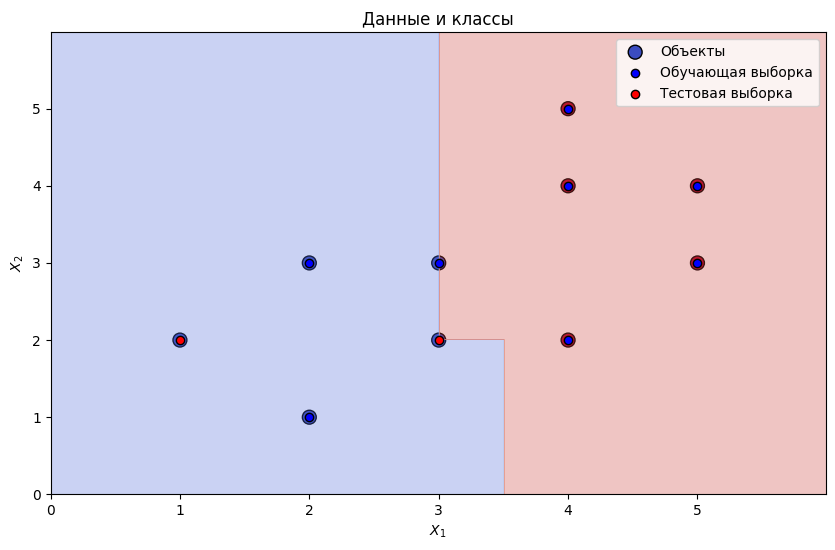

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Данные
data = {
    'X1': [2, 1, 4, 5, 3, 4, 2, 5, 3, 4],
    'X2': [3, 2, 5, 4, 3, 2, 1, 3, 2, 4],
    'Y': [0, 0, 1, 1, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Разделение данных на признаки и целевую переменную
X = df[['X1', 'X2']]
y = df['Y']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели случайного леса
model = RandomForestClassifier(n_estimators=3, random_state=42)
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(df['X1'], df['X2'], c=df['Y'], s=100, edgecolor='k', cmap='coolwarm', label='Объекты')
plt.title('Данные и классы')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')

# Построение границ решения
x_min, x_max = df['X1'].min() - 1, df['X1'].max() + 1
y_min, y_max = df['X2'].min() - 1, df['X2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train['X1'], X_train['X2'], c='blue', label='Обучающая выборка', edgecolor='k')
plt.scatter(X_test['X1'], X_test['X2'], c='red', label='Тестовая выборка', edgecolor='k')
plt.legend()
plt.show()

### Вопросы для самопроверки:

1. Что такое случайный лес (Random Forest)?
2. Какую основную задачу решает метод случайного леса?
3. В чем заключается отличие случайного леса от одного дерева решений?
4. Какую роль в случайном лесе играет бутстрап-выборка?
5. Почему в случайном лесе для каждого узла выбирается случайное подмножество признаков?
6. Какие метрики используются для оценки разделения в деревьях решений?
7. Что такое индекс Джини и как он используется в классификации?
8. В чем разница между индексом Джини и кросс-энтропией?
9. Как случайный лес предотвращает переобучение?
10. Как производится предсказание в случайном лесе для задач классификации?
11. Как производится предсказание в случайном лесе для задач регрессии?
12. Какие метрики используются для оценки качества работы случайного леса?
13. Назовите основные преимущества случайного леса.
14. В чем заключаются основные недостатки случайного леса?
15. Как случайный лес можно применять для задачи регрессии?

### Задачи для самостоятельной работы:

1. Постройте дерево решений для небольшого датасета и объясните, как происходят разделения в узлах.
2. Реализуйте случайный лес для задачи классификации на произвольном наборе данных.
3. Проведите сравнение между одним деревом решений и случайным лесом по точности и устойчивости к переобучению.
4. Реализуйте модель случайного леса для задачи регрессии.
5. Используйте случайный лес для классификации известного набора данных, например, Iris dataset.
6. Измените количество деревьев в случайном лесе и проанализируйте влияние на точность предсказания.
7. Изучите влияние размера подвыборки данных на качество случайного леса.
8. Оцените важность признаков с помощью случайного леса на произвольном наборе данных.
9. Постройте график зависимости точности случайного леса от количества признаков, используемых для разделений в узлах.
10. Реализуйте случайный лес, обученный на бутстрап-выборках, и без них. Сравните результаты.
11. Примените случайный лес для задачи прогнозирования цен на жилье и оцените его точность.
12. Выполните кросс-валидацию случайного леса для задачи классификации на произвольном наборе данных.
13. Протестируйте случайный лес на данных с пропущенными значениями. Как модель справляется с ними?
14. Реализуйте случайный лес с использованием различных критериев разделения (индекс Джини, кросс-энтропия) и сравните их результаты.
15. Проверьте влияние глубины деревьев на качество случайного леса.
16. Постройте случайный лес с использованием признаков, отмасштабированных с помощью стандартного нормирования. Как это повлияет на результат?
17. Используйте случайный лес для задачи многоклассовой классификации и оцените его точность на разных классах.
18. Примените случайный лес для задач медицинской диагностики и оцените его качество.
19. Реализуйте случайный лес с ограничением максимального количества признаков для разделений в узлах.
20. Постройте графики важности признаков для случайного леса и объясните, какие признаки наиболее важны.
21. Примените метод случайного леса для решения задачи классификации текстов и оцените его производительность.
22. Используйте случайный лес для обработки изображений. Какие результаты вы получите?
23. Примените случайный лес для задачи прогнозирования временных рядов и оцените его эффективность.
24. Реализуйте случайный лес с использованием метода "Out-of-Bag" (OOB) и проанализируйте его результаты.
25. Проведите эксперимент с различным числом деревьев в случайном лесу и оцените его влияние на качество предсказаний.
26. Изучите влияние глубины деревьев на время обучения случайного леса.
27. Реализуйте случайный лес для задачи классификации на многомерных данных и оцените его точность.
28. Сравните случайный лес с другими ансамблевыми методами, такими как градиентный бустинг, на одном и том же наборе данных.
29. Примените случайный лес для прогнозирования отказов оборудования и оцените его точность.
30. Реализуйте случайный лес для задачи детекции аномалий и оцените его точность на наборе данных с аномалиями.